# Power Consumption Dataset EDA (*Exploratory Data Analysis*)

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import pandas_profiling as pp
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
%load_ext autoreload
%autoreload 2

random_state = np.random.RandomState(42)

### Import own utils

In [2]:
from utils.dataset_processing import *
# hw_4
from hw_4.model_selection.train_test_split import train_test_split

### Downloading the Dataset

In [3]:
initial_dataset = pd.read_csv('datasets/household_power_consumption.csv')

In [4]:
dataset = initial_dataset.copy()

In [5]:
dataset.head()

Date      Time Global_active_power Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00               4.216                 0.418  234.840   
1  16/12/2006  17:25:00               5.360                 0.436  233.630   
2  16/12/2006  17:26:00               5.374                 0.498  233.290   
3  16/12/2006  17:27:00               5.388                 0.502  233.740   
4  16/12/2006  17:28:00               3.666                 0.528  235.680   

  Global_intensity Sub_metering_1 Sub_metering_2  Sub_metering_3  
0           18.400          0.000          1.000            17.0  
1           23.000          0.000          1.000            16.0  
2           23.000          0.000          2.000            17.0  
3           23.000          0.000          1.000            17.0  
4           15.800          0.000          1.000            17.0

In [6]:
dataset.size

18677331

In [7]:
dataset.shape

(2075259, 9)

In [8]:
dataset.dtypes

Date                      object
Time                      object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

Transform date and time columns into datetime column

In [9]:
dataset['datetime'] = pd.to_datetime(dataset['Date'] + ' ' + dataset['Time'])

In [10]:
dataset.set_index('datetime', inplace=True)

In [11]:
dataset.drop(columns=['Date', 'Time'], inplace=True)

In [12]:
dataset['Global_active_power'] = pd.to_numeric(dataset['Global_active_power'], errors='coerce')
dataset['Global_reactive_power'] = pd.to_numeric(dataset['Global_reactive_power'], errors='coerce')
dataset['Voltage'] = pd.to_numeric(dataset['Voltage'], errors='coerce')
dataset['Global_intensity'] = pd.to_numeric(dataset['Global_intensity'], errors='coerce')
dataset['Sub_metering_1'] = pd.to_numeric(dataset['Sub_metering_1'], errors='coerce')
dataset['Sub_metering_2'] = pd.to_numeric(dataset['Sub_metering_2'], errors='coerce')

In [13]:
dataset.head()

Global_active_power  Global_reactive_power  Voltage  \
datetime                                                                   
2006-12-16 17:24:00                4.216                  0.418   234.84   
2006-12-16 17:25:00                5.360                  0.436   233.63   
2006-12-16 17:26:00                5.374                  0.498   233.29   
2006-12-16 17:27:00                5.388                  0.502   233.74   
2006-12-16 17:28:00                3.666                  0.528   235.68   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
datetime                                                                
2006-12-16 17:24:00              18.4             0.0             1.0   
2006-12-16 17:25:00              23.0             0.0             1.0   
2006-12-16 17:26:00              23.0             0.0             2.0   
2006-12-16 17:27:00              23.0             0.0             1.0   
2006-12-16 17:28:00              15.8             0.0             1.0   

                     Sub_metering_3  
datetime                             
2006-12-16 17:24:00            17.0  
2006-12-16 17:25:00            16.0  
2006-12-16 17:26:00            17.0  
2006-12-16 17:27:00            17.0  
2006-12-16 17:28:00            17.0

In [14]:
dataset.dtypes

Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

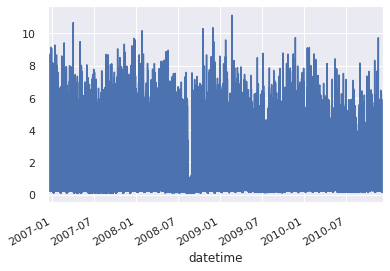

In [15]:
dataset['Global_active_power'].plot()

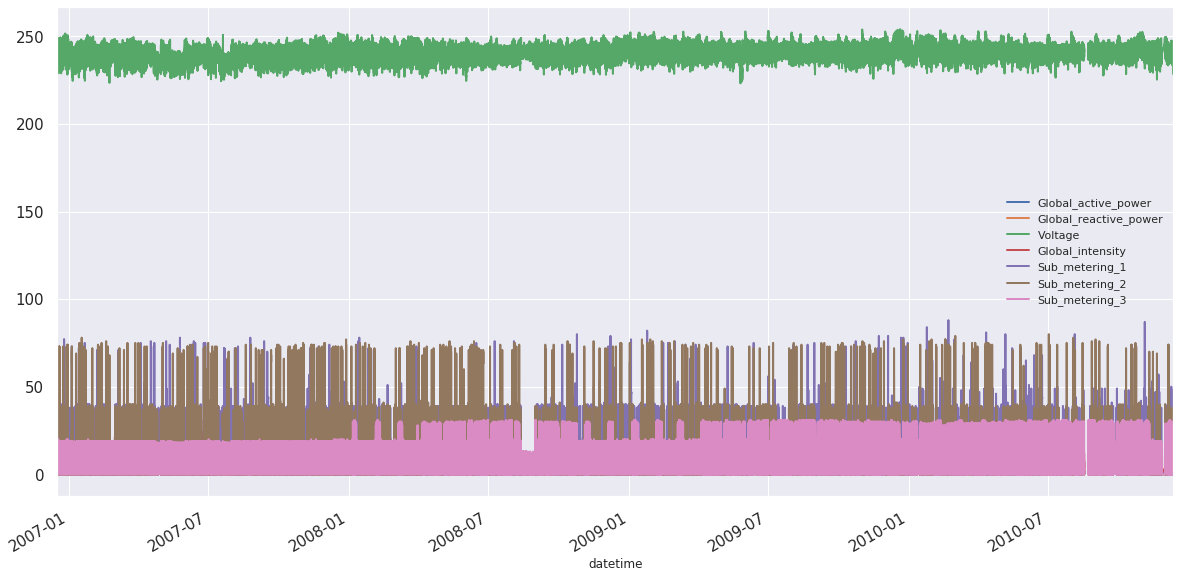

In [16]:
dataset.plot(figsize=(20,10), linewidth=2, fontsize=15)

### Detecting Missing Values

In [17]:
dataset.isna().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [18]:
dataset.isna().mean()

Global_active_power      0.012518
Global_reactive_power    0.012518
Voltage                  0.012518
Global_intensity         0.012518
Sub_metering_1           0.012518
Sub_metering_2           0.012518
Sub_metering_3           0.012518
dtype: float64

Number of rows with missing values:

In [19]:
sum(dataset.isna().sum() != 0)

7

In [20]:
dataset.dropna(inplace=True)

In [21]:
dataset.isna().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

### Analyzing distribution of values

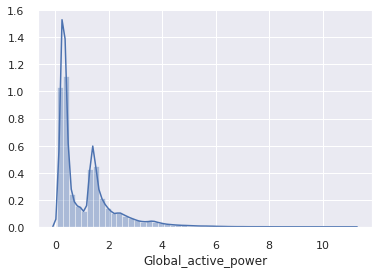

In [22]:
sns.distplot(dataset['Global_active_power'])

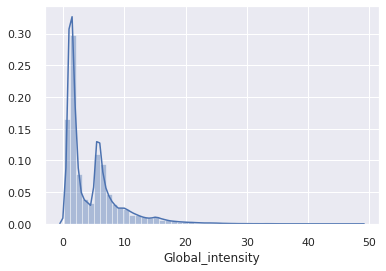

In [23]:
sns.distplot(dataset['Global_intensity'])

### It seems that Glabal_active_power and Global_intensity have similar graphs

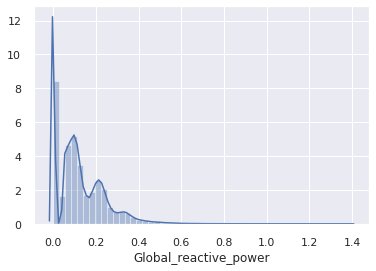

In [24]:
sns.distplot(dataset['Global_reactive_power'])

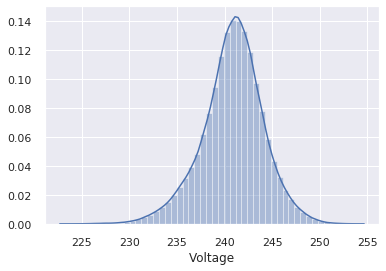

In [25]:
sns.distplot(dataset['Voltage'])

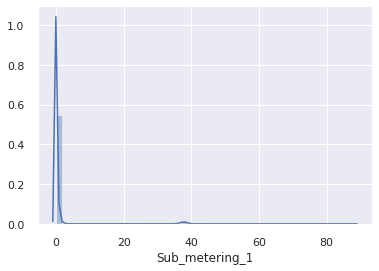

In [26]:
sns.distplot(dataset['Sub_metering_1'])

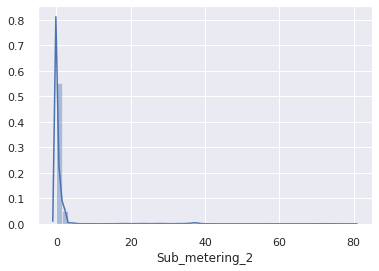

In [27]:
sns.distplot(dataset['Sub_metering_2'])

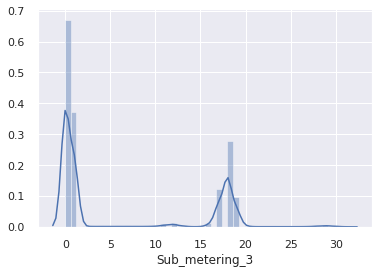

In [28]:
sns.distplot(dataset['Sub_metering_3'])

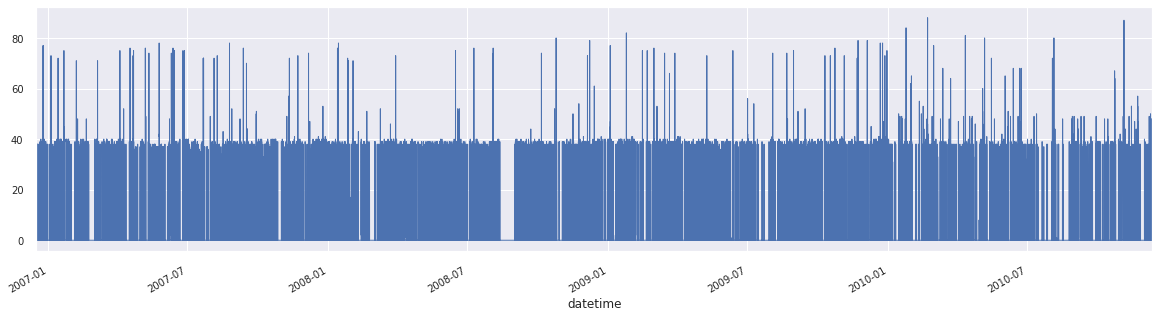

In [29]:
dataset['Sub_metering_1'].plot(figsize=(20,5), linewidth=1, fontsize=10)

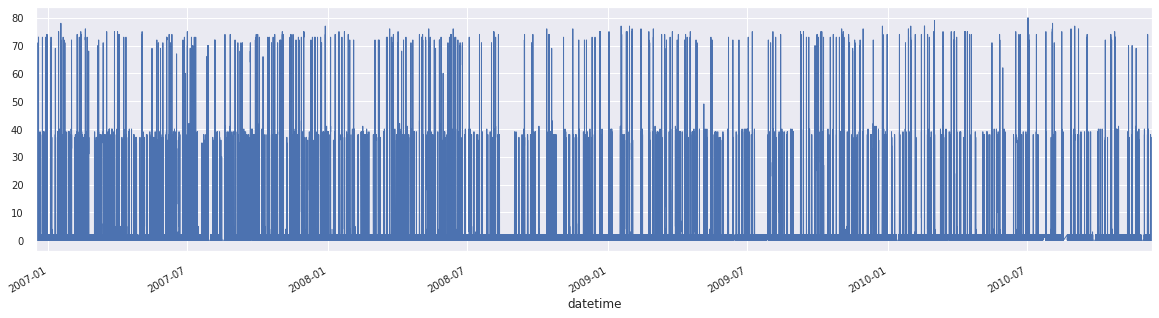

In [30]:
dataset['Sub_metering_2'].plot(figsize=(20,5), linewidth=1, fontsize=10)

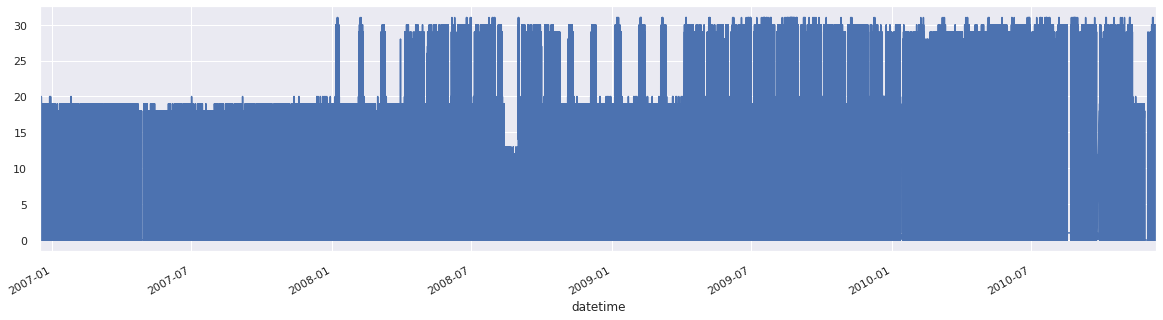

In [31]:
dataset['Sub_metering_3'].plot(figsize=(20,5))

### Change in daily average Global_active_power

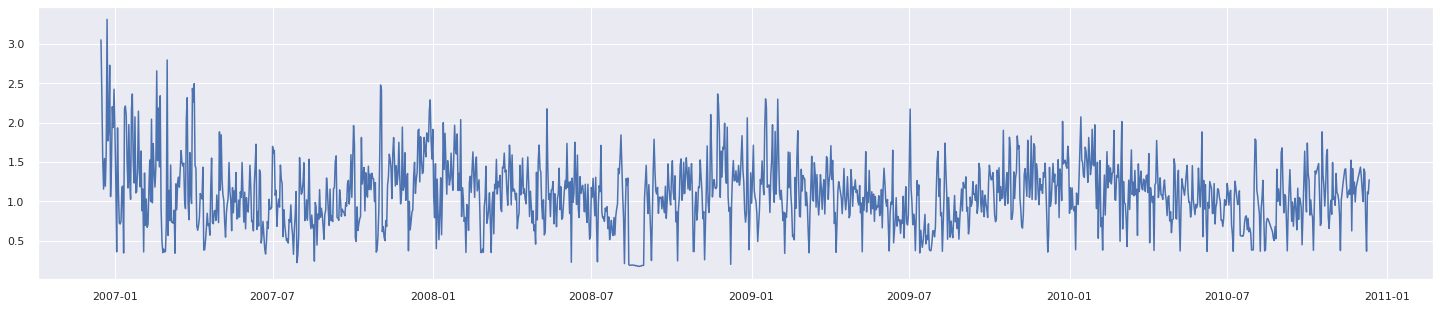

In [32]:
glob_act_power = dataset['Global_active_power']
# avg_glob_act_power = pd.DataFrame(glob_act_power.groupby(glob_act_power.index.date))
# avg_glob_act_power.head()[1]
dates = []
means = []
for idx, day in glob_act_power.groupby(glob_act_power.index.date):
    dates.append(idx)
    means.append(day.mean())
plt.figure(figsize=(25, 5))
sns.lineplot(x=dates, y=means)

There is yearly seasonality

In [33]:
first_day_data = dataset['2008-02-01']
second_day_data = dataset['2008-02-02']
first_day_data['Active_energy'] = first_day_data['Global_active_power'] * 1000 / 60 - first_day_data['Sub_metering_1'] - first_day_data['Sub_metering_2'] - first_day_data['Sub_metering_3']
second_day_data['Active_energy'] = second_day_data['Global_active_power'] * 1000 / 60 - second_day_data['Sub_metering_1'] - second_day_data['Sub_metering_2'] - second_day_data['Sub_metering_3']

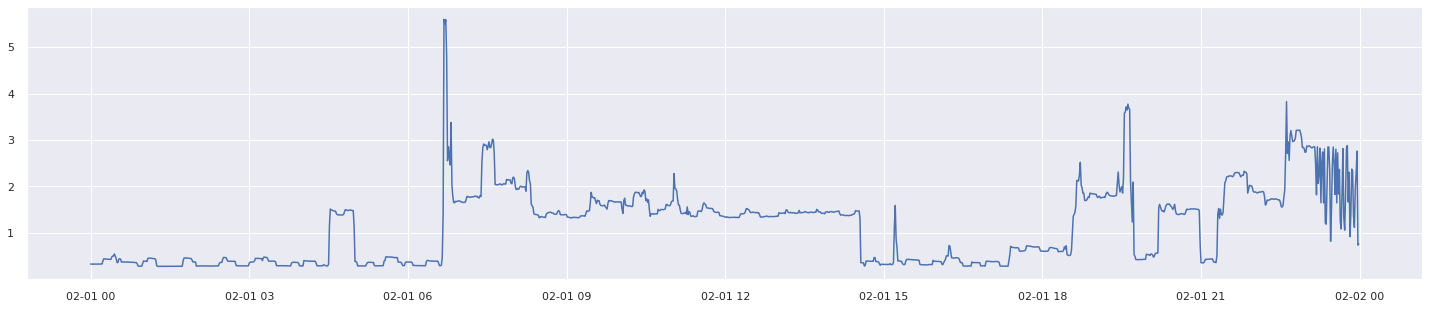

In [34]:
plt.figure(figsize=(25, 5))
sns.lineplot(data=first_day_data['Global_active_power'])

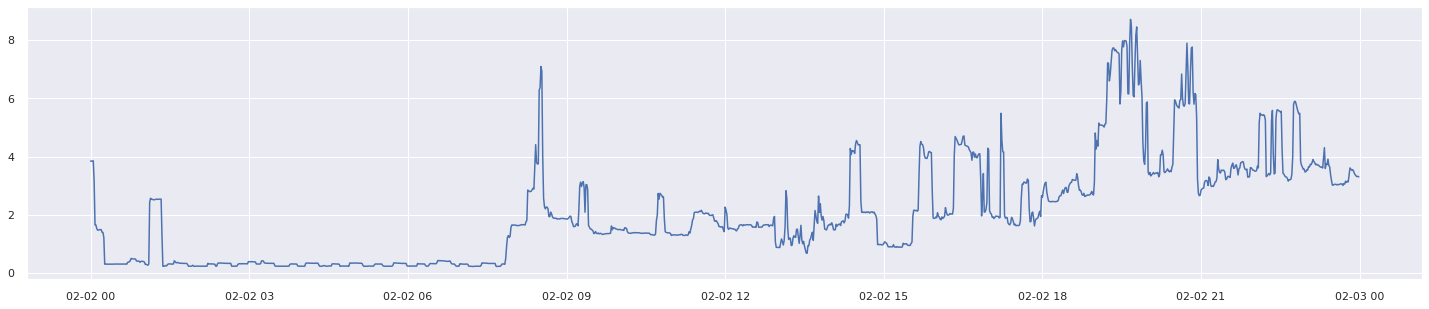

In [35]:
plt.figure(figsize=(25, 5))
sns.lineplot(data=second_day_data['Global_active_power'])

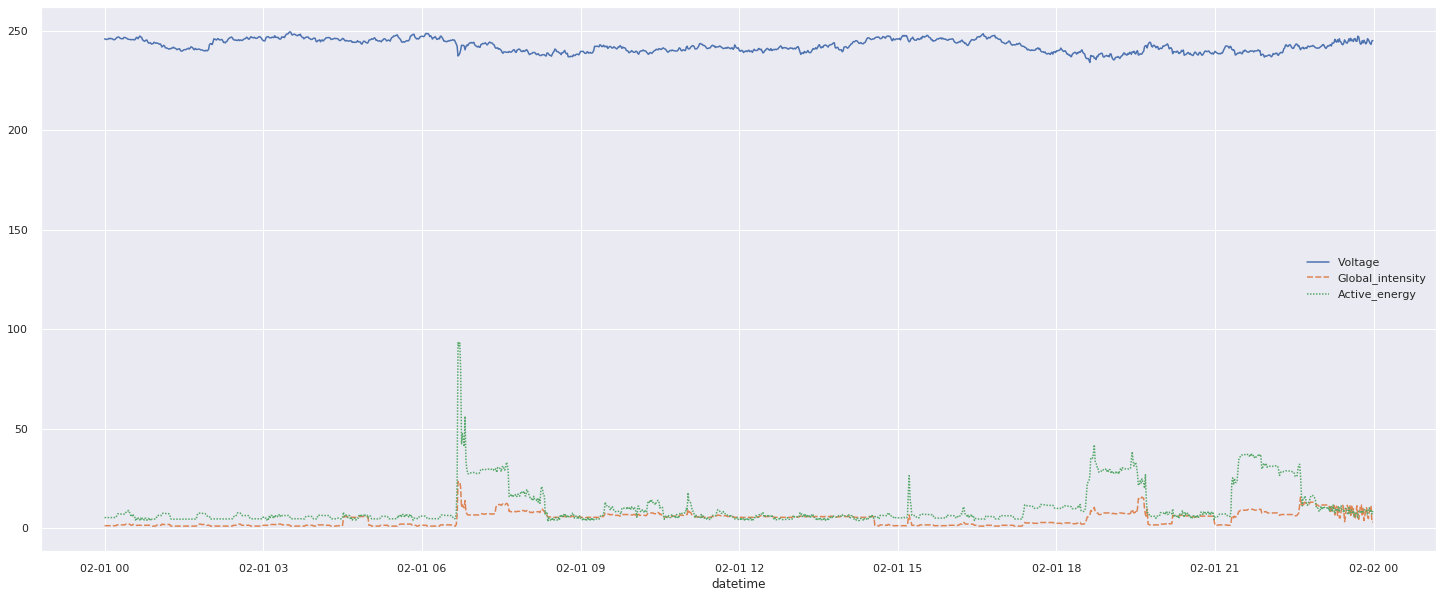

In [36]:
plt.figure(figsize=(25, 10))
sns.lineplot(data=first_day_data[['Voltage', 'Global_intensity', 'Active_energy']])

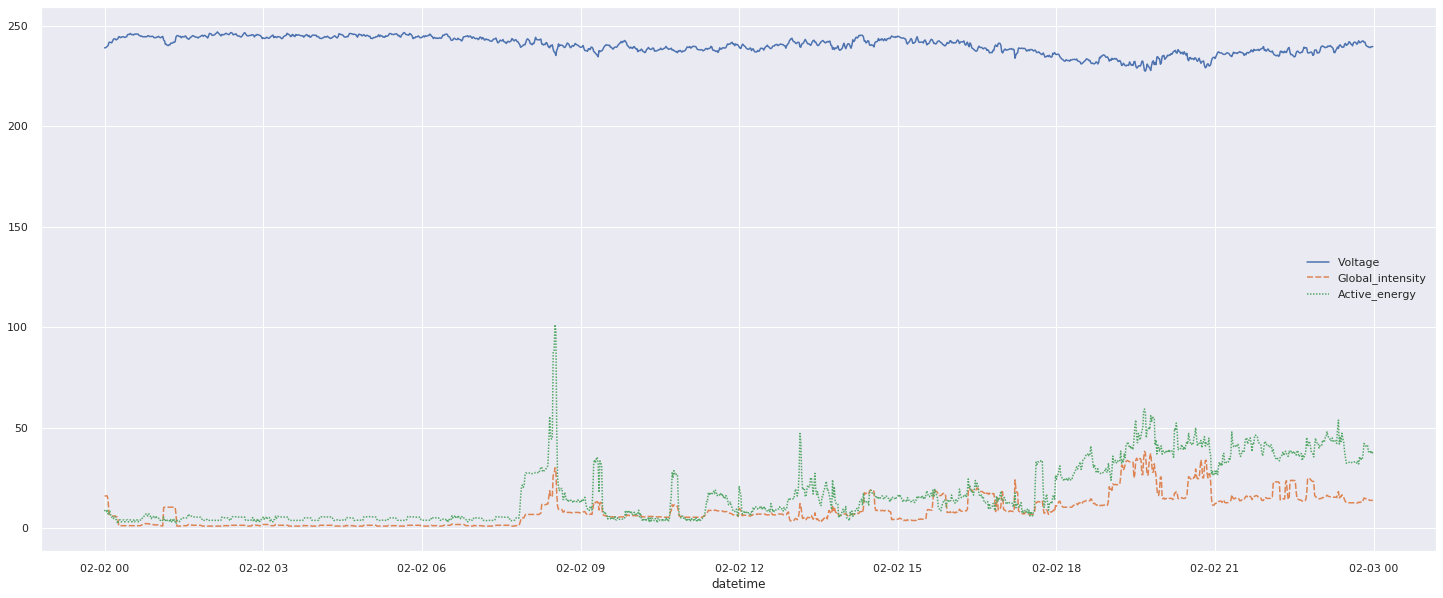

In [37]:
plt.figure(figsize=(25, 10))
sns.lineplot(data=second_day_data[['Voltage', 'Global_intensity', 'Active_energy']])

### Dates with abnormal voltage

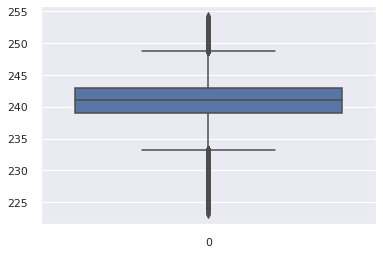

In [38]:
sns.boxplot(data=dataset['Voltage'])

In [39]:
voltage_outliers = detect_outliers(dataset, 3, ['Voltage'])
voltage_outliers

[]

### Analyzing correlation between columns

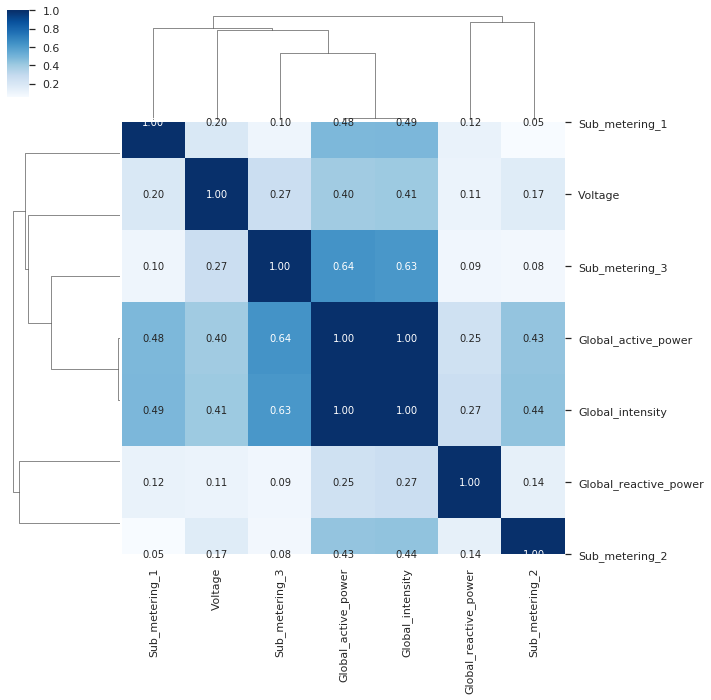

In [40]:
sns.clustermap(data = dataset.corr().abs(), annot=True, fmt = ".2f", cmap = 'Blues');

In [41]:
dataset.drop(columns="Global_intensity", inplace=True)

### Splitting the Dataset into Test set and Train set

In [42]:
X, y = dataset.drop(columns='Global_active_power'), dataset['Global_active_power']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=80)

## Pandas Profiling Report

In [43]:
pp.ProfileReport(initial_dataset, check_recoded=False)

In [44]:
pp.ProfileReport(dataset, check_recoded=False)